**#Importing libraries & getting the data.**

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

[*********************100%%**********************]  1 of 1 completed


           Date       Open       High        Low      Close   Volume
0    2015-01-02  19.290001  19.770000  18.990000  19.379999   280800
1    2015-01-05  19.110001  19.180000  18.129999  18.320000   565300
2    2015-01-06  18.389999  18.690001  17.530001  18.480000   457700
3    2015-01-07  18.629999  20.450001  18.629999  20.340000   679600
4    2015-01-08  20.700001  21.680000  19.510000  21.209999  1113300
...         ...        ...        ...        ...        ...      ...
2009 2022-12-23   4.180000   4.320000   4.150000   4.260000   225000
2010 2022-12-27   4.230000   4.260000   4.140000   4.210000   319200
2011 2022-12-28   4.170000   4.300000   4.130000   4.150000   239500
2012 2022-12-29   4.150000   4.350000   4.110000   4.300000   249400
2013 2022-12-30   4.210000   4.400000   4.200000   4.310000   447700

[2014 rows x 6 columns]


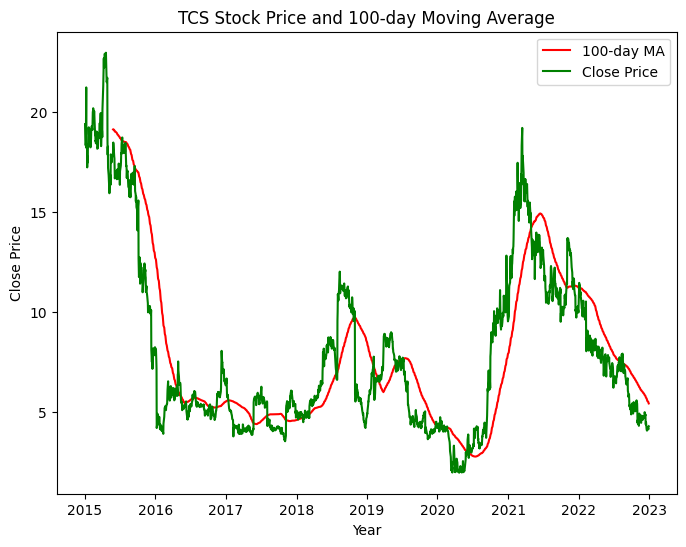

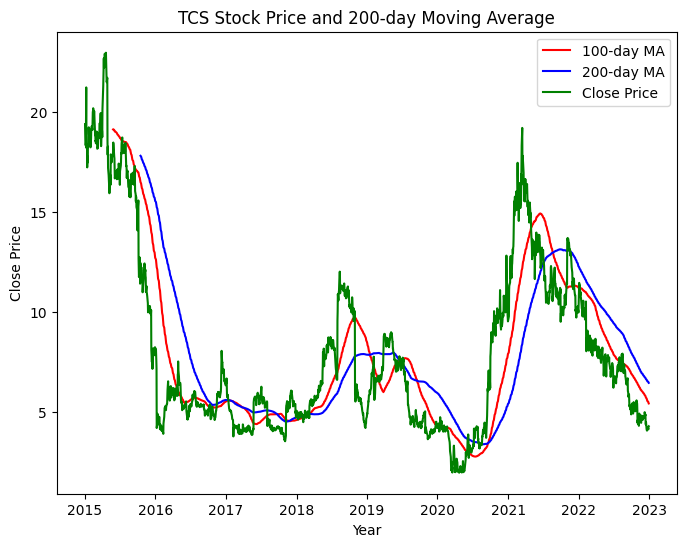

The maximum value in the Close column is: 22.940000534057617
The minimum value in the Close column is: 1.9900000095367432


In [ ]:

# Define start and end dates for data extraction
start_date = '2015-01-01'
end_date = '2023-01-01'
stock = "TCS"

# INPUT FROM USER :-
# stock = input("Enter the stock symbol (e.g., TCS): ")
# start_date_str = input("Enter the start date (YYYY-MM-DD): ")
# end_date_str = input("Enter the end date (YYYY-MM-DD): ")

# # Convert strings to datetime objects
# start_date = datetime.datetime.strptime(start_date_str, "%Y-%m-%d")
# end_date = datetime.datetime.strptime(end_date_str, "%Y-%m-%d")

# # Download stock data
# data = yf.download(stock, start=start_date, end=end_date)
# data.reset_index(inplace=True)
# data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
# print(data)

# Download stock data
data = yf.download(stock, start=start_date, end=end_date)
data = pd.DataFrame(data)
data.reset_index(inplace=True)
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.dropna(inplace=True)
print(data)

# Plot moving averages
plt.figure(figsize=(8,6))
ma_100_days = data.Close.rolling(100).mean()
plt.plot(data['Date'],ma_100_days, 'r', label='100-day MA')
plt.plot(data['Date'], data['Close'], 'g', label='Close Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('TCS Stock Price and 100-day Moving Average')
plt.legend()
plt.show()

ma_200_days = data.Close.rolling(200).mean()
plt.figure(figsize=(8,6))
plt.plot(data['Date'],ma_100_days, 'r', label='100-day MA')
plt.plot(data['Date'],ma_200_days, 'b', label='200-day MA')
plt.plot(data['Date'],data.Close, 'g', label='Close Price')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.title('TCS Stock Price and 200-day Moving Average')
plt.legend()
plt.show()


# Find the maximum value in the Close column
max_close = data['Close'].max()
print(f'The maximum value in the Close column is: {max_close}')


# Find the Minimum value in the Close column
mIN_close = data['Close'].min()
print(f'The minimum value in the Close column is: {mIN_close}')


# LSTM Model

In [ ]:
!pip install keras
!pip install tensorflow

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from keras.models import load_model

In [ ]:
# splitting into training and testing data for LSTM model
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.8)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])
data_test.shape[0]
data_train.shape[0]

#Use MinMaxScaler to scale training data to a range of (0,1).
scaler=MinMaxScaler(feature_range=(0,1))

#Preparing training data  for scaled data.
data_train_scale=scaler.fit_transform(data_train)

#creating i/p & o/p sequence for LSTM model using sliding window of 100 days.
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

x,y=np.array(x),np.array(y)

#Building LSTM Model.
#Define a squential model with multiple LSTM Layers,dro[out layers to prevent overfitting & dense layer for the o/p.
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True, input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

#Compile the model with adam optimizer & mean squared loss.
model.compile(optimizer='adam',loss='mean_squared_error')

#Train the model using the prepared training data for 50 epoch with batch size of 32.
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

model.summary()




Epoch 1/50
48/48 [==============================] - 19s 293ms/step - loss: 0.0251
Epoch 2/50
48/48 [==============================] - 14s 293ms/step - loss: 0.0071
Epoch 3/50
48/48 [==============================] - 14s 293ms/step - loss: 0.0062
Epoch 4/50
48/48 [==============================] - 14s 294ms/step - loss: 0.0051
Epoch 5/50
48/48 [==============================] - 14s 288ms/step - loss: 0.0044
Epoch 6/50
48/48 [==============================] - 16s 332ms/step - loss: 0.0044
Epoch 7/50
48/48 [==============================] - 14s 295ms/step - loss: 0.0039
Epoch 8/50
48/48 [==============================] - 14s 292ms/step - loss: 0.0045
Epoch 9/50
48/48 [==============================] - 14s 292ms/step - loss: 0.0036
Epoch 10/50
48/48 [==============================] - 14s 294ms/step - loss: 0.0038
Epoch 11/50
48/48 [==============================] - 17s 350ms/step - loss: 0.0034
Epoch 12/50
48/48 [==============================] - 14s 295ms/step - loss: 0.0029
Epoch 13/50
4

In [ ]:
#Preparing Test data:Combining the last 100 days of training set withe the test set & scale the combined data.
pas_100_days=data_train.tail(100)
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)
data_test

,Close
0,9.72
1,9.79
2,11.07
3,11.35
4,11.36
...,...
598,4.26
599,4.21
600,4.15
601,4.30


In [ ]:
data_test_scale = scaler.fit_transform(data_test)
data_test_scale

array([[0.37284768],
       [0.37748342],
       [0.46225161],
       [0.4807947 ],
       [0.48145691],
       [0.48940392],
       [0.52649004],
       [0.5682119 ],
       [0.57682118],
       [0.502649  ],
       [0.51721849],
       [0.50529801],
       [0.54701987],
       [0.55231788],
       [0.59999995],
       [0.58609266],
       [0.60463575],
       [0.60794702],
       [0.63178806],
       [0.75629138],
       [0.70993377],
       [0.76026485],
       [0.76291386],
       [0.77284767],
       [0.74966884],
       [0.73046354],
       [0.72781454],
       [0.77814568],
       [0.79006623],
       [0.75231784],
       [0.73046354],
       [0.84701978],
       [0.88476823],
       [0.75827811],
       [0.74900657],
       [0.76754966],
       [0.69271522],
       [0.74437083],
       [0.80596025],
       [0.8178808 ],
       [0.81324506],
       [0.77086087],
       [0.73509928],
       [0.75496684],
       [0.84701978],
       [0.81125826],
       [0.88476823],
       [0.941

In [ ]:
#Prepare the test data for prediction
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x ,y = np.array(x),np.array(y)

In [ ]:
#Predicting stock prices: Create i/p sequence for the test data & use the train model to predict the stock prices.
y_predict= model.predict(x)

16/16 [==============================] - 1s 81ms/step


In [ ]:
scale=1/scaler.scale_               # This is the value which is used to divide by to the values which we fit transformed it in range of (0,1).i.e. 1/scaler.scale_=82.71 .e.g:any train set value/82.71 =0. ....

In [ ]:
y_predict =y_predict*scale

In [ ]:
y = y*scale

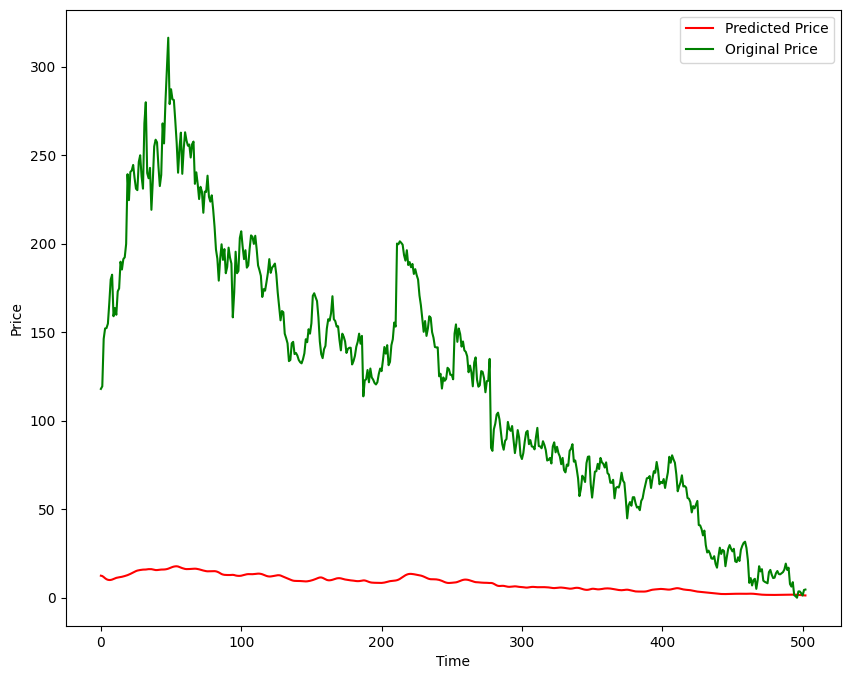

Mean Squared Error (MSE): 17607.70113400838
Root Mean Squared Error (RMSE): 132.69401318073238
Mean Absolute Error (MAE): 113.93765131439643
R-squared (R²): -2.3561208969847325


In [ ]:
#Plotting Predictions
#Plot the predicted stock prices against the actual stock prices to visualize the model's performance

plt.figure(figsize=(10,8))
plt.plot(y_predict,'r', label ='Predicted Price')
plt.plot(y,'g' ,label = 'Original Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


# Calculate the evaluation metrics
mse = mean_squared_error(y, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_predict)
r2 = r2_score(y, y_predict)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

In [ ]:
model.save('Stock Predictions Model.keras')

# Support Vector Machine(SVM)

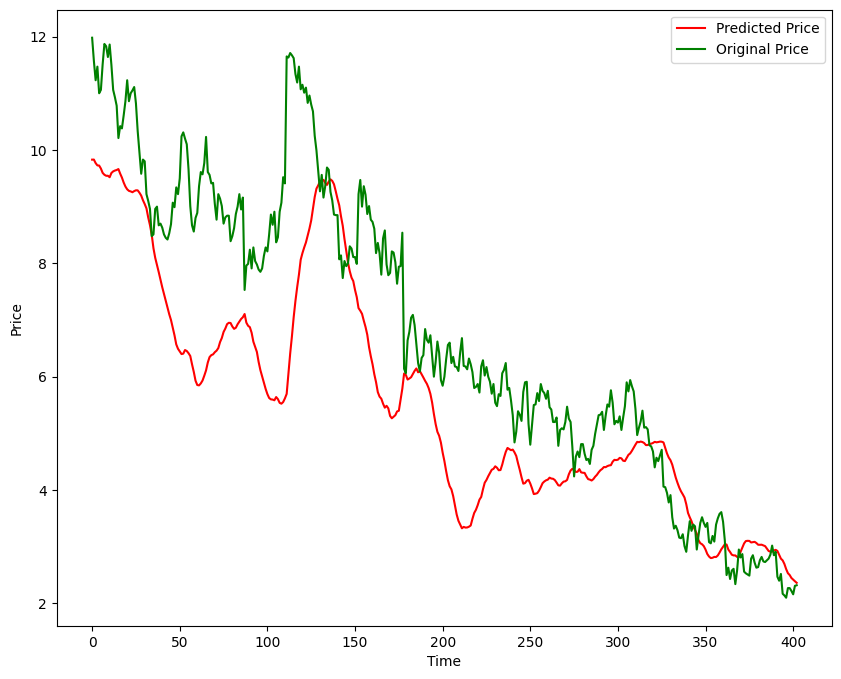

Mean Squared Error (MSE): 3.117237103316216
Root Mean Squared Error (RMSE): 1.7655699089291865
Mean Absolute Error (MAE): 1.3800827118846057
Mean Absolute Percentage Error (MAPE): 0.19202089381031995


In [ ]:
from sklearn.svm import SVR     # Importing Support Vector Regression (SVR) from sklearn

# Split data into training and testing sets
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.8)]) # Take first 80% of data for training
data_test = pd.DataFrame(data.Close[int(len(data)*0.8):len(data)])  # Take remaining 20% of data for testing

# Scale data using MinMaxScaler to normalize values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scale = scaler.fit_transform(data_train)

# Prepare training data for svm model
x_train, y_train = [], []
# Create sequences of 100 days of historical data as input (x_train) and the next day's closing price as output (y_train)
for i in range(100, data_train_scale.shape[0]):
    x_train.append(data_train_scale[i-100:i])   # Sliding window of 100 days
    y_train.append(data_train_scale[i, 0])      # Next day's closing price
x_train, y_train = np.array(x_train), np.array(y_train)

# Flatten the input for SVM (if required by SVM model)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1])

# Define and train the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(x_train, y_train)

# Prepare test data by scaling and concatenating the last 100 days of training data with actual test data
past_100_days = data_train.tail(100)   # Last 100 days of training data
data_test = pd.concat([past_100_days, data_test], ignore_index=True)
data_test_scale = scaler.transform(data_test)   # Scale the combined data using the same scaler

# Scale the combined data using the same scaler
x_test, y_test = [], []
for i in range(100, data_test_scale.shape[0]):
    x_test.append(data_test_scale[i-100:i])    # Sliding window of 100 days
    y_test.append(data_test_scale[i, 0])       # Next day's closing price as the label
x_test, y_test = np.array(x_test), np.array(y_test)

# Flatten the input for SVM
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1])

# Make predictions using the trained SVR model on test data
y_predict = svr_model.predict(x_test)

# Rescale predictions and actual values back to original scale
scale_factor = 1 / scaler.scale_[0]  # Inverse scaling factor for rescaling
y_predict = y_predict * scale_factor # Rescaling predicted values
y_test = y_test * scale_factor  # Rescaling actual values

# Plot predictions vs actual prices using matplotlib
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y_test, 'g', label='Original Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Evaluation metrics
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
mape = mean_absolute_percentage_error(y_test, y_predict)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

**Decision Tree Random Forest**



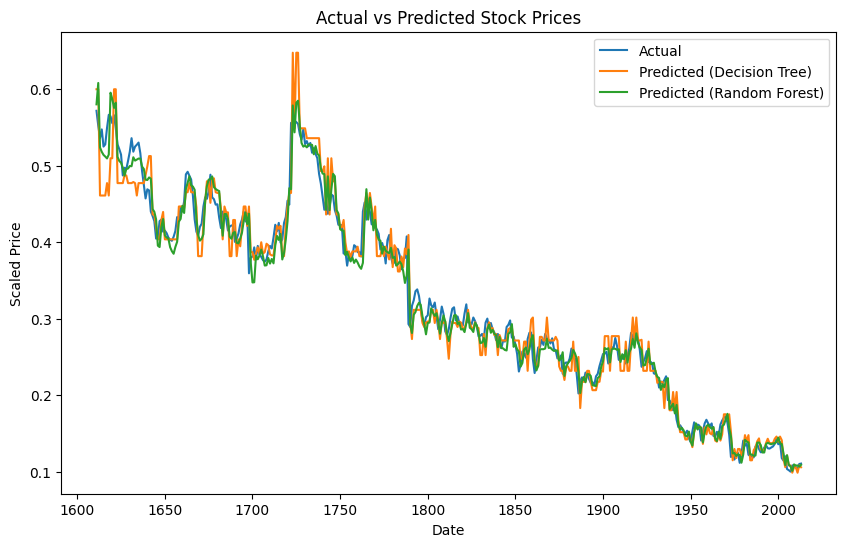

Decision Tree Model:
Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Mean Absolute Percentage Error (MAPE): 0.06%

Random Forest Model:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Mean Absolute Percentage Error (MAPE): 0.04%


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing sets for Dacision tree and Random Forest
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.8)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.8):len(data)])

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scale = scaler.fit_transform(data_train)

# Prepare training data for Decision Tree
x_train_dt, y_train_dt = [], []
for i in range(100, data_train_scale.shape[0]):
    x_train_dt.append(data_train_scale[i-100:i, 0])
    y_train_dt.append(data_train_scale[i, 0])
x_train_dt, y_train_dt = np.array(x_train_dt), np.array(y_train_dt)

# Prepare test data for Decision Tree
past_100_days = data_train.tail(100)
data_test_dt = pd.concat([past_100_days, data_test], ignore_index=True)
data_test_scale_dt = scaler.transform(data_test_dt)

x_test_dt, y_test_dt = [], []
for i in range(100, data_test_scale_dt.shape[0]):
    x_test_dt.append(data_test_scale_dt[i-100:i, 0])
    y_test_dt.append(data_test_scale_dt[i, 0])
x_test_dt, y_test_dt = np.array(x_test_dt), np.array(y_test_dt)

# Define and train Decision Tree model
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(x_train_dt, y_train_dt)

# Make predictions for decision tree model
y_pred_dt = dt_model.predict(x_test_dt)


# Define and train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(x_train_dt, y_train_dt)

# Make predictions for random forest model
y_pred_rf = rf_model.predict(x_test_dt)


# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data_test.index, y_test_dt, label='Actual')
plt.plot(data_test.index, y_pred_dt, label='Predicted (Decision Tree)')
plt.plot(data_test.index, y_pred_rf, label='Predicted (Random Forest)')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()

# Evaluate Decision Tree model
mae_dt = mean_absolute_error(y_test_dt, y_pred_dt)
mse_dt = mean_squared_error(y_test_dt, y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test_dt, y_pred_dt)
print("Decision Tree Model:")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_dt:.2f}%")

# Evaluate Random Forest model
mae_rf = mean_absolute_error(y_test_dt, y_pred_rf)
mse_rf = mean_squared_error(y_test_dt, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test_dt, y_pred_rf)

print("\nRandom Forest Model:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%")


# Linear Regression

Evalution metrics for Linear Regression :
Mean Absolute Error (MAE): 0.12707264085682002
Mean Squared Error (MSE): 0.035568427452968135
Root Mean Squared Error (RMSE): 0.1885959370001595
R-squared (R2): 0.9982566295374773


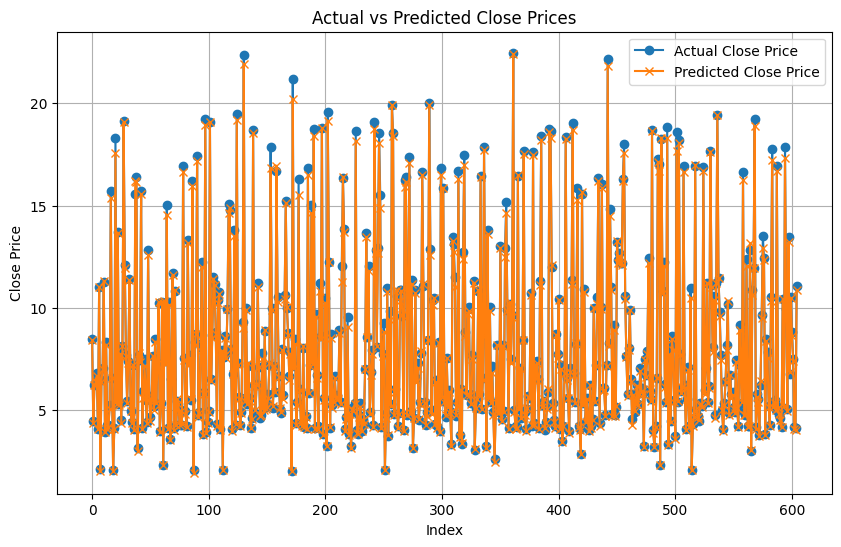

In [ ]:
#'data' is a DataFrame containing stock data with columns: 'Open', 'High', 'Low', 'Close', 'Volume'
# Splitting data into features (x) and target variable (y)
x=data[["Open", "High", "Low", "Volume"]]  # Features
y=data["Close"]  # Target Variable


from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets (70% train, 30% test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=73)

# Checking the shapes of the training and testing sets
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

from sklearn.preprocessing import StandardScaler
# Standardizing the features using StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
#print(x_train)


from sklearn.linear_model import LinearRegression
# Creating a Linear Regression model
regression=LinearRegression()
regression
# Fitting the model on the training data
regression.fit(x_train,y_train)

# Retrieving coefficients and intercept
regression.coef_
regression.intercept_

# Making predictions on the test data
y_pred=regression.predict(x_test)
y_pred

# Calculating evaluation metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evalution metrics for Linear Regression :")
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

# Plotting the original vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Close Price', marker='o')
plt.plot(y_pred, label='Predicted Close Price', marker='x')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Index')      # data poitns of y_test[0] & y_pred[0]
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()